In [26]:
import sqlalchemy, numpy as np, pandas as pd, matplotlib.pyplot as plt, seaborn as sns
pd.set_option('display.max_columns', None) 
pd.set_option('display.max_rows', 20) 
from django.conf import settings  

import sys, os    
sys.path.append(os.path.abspath(os.path.join(os.path.dirname('functions.py'), '..', '..', 'PY')))
import functions 

In [27]:
# def combine_dfs(dfs):
#     master = dfs[0]
#     for i in range(1, len(dfs)):
#         cols_new = dfs[i].columns.difference(master.columns).tolist() 
#         cols_new.append('Player') 
#         master = pd.merge(master, dfs[i][cols_new], on="Player") 
#     return master 

# def clean_player(name): 
#     i = name.find('*') 
#     clean_name = name 
#     if i > -1: 
#         clean_name = clean_name[:i] 
#     return clean_name 

In [28]:
db_path = "sqlite:///../../DB/ballbase.db" 

engine = sqlalchemy.create_engine(db_path) 
# seasons = functions.generate_seasons(1949, 2024) 
# master = pd.DataFrame() 
# ssn = pd.DataFrame() 

# for season in seasons: 
#     master_temp = pd.read_sql("master_" + season, con=engine)
#     master_temp.insert(1, "Season", [season]*len(master_temp), True) 
#     master_temp['Season'] = season.replace('_', '-') 

#     master = pd.concat([master, master_temp], axis=0) 

# allstars = pd.read_sql('allstars', con=engine) 

# master = master if 'AS' in master.columns else master.merge(allstars, how='left', on=['Player', 'Season']) 
# master = master.rename(columns = {'Status':'AS'}) 
# master['AS'] = master['AS'].apply(lambda x: False if pd.isna(x) else True)
# master['AS'] = master['AS'].astype("float64")

# for col_name in master.columns: 
#     # master[col_name].fillna(np.mean(master[col_name].dropna(axis=0)), inplace=True)
#     master[col_name].fillna(0, inplace=True)

# numeric_df = master[master['Season']!='2023-24'] 
# numeric_df = numeric_df.select_dtypes(include = [np.number])  

# master 


In [29]:
# master.to_sql('master_alltime', con=engine) 

In [30]:
master = pd.read_sql('master_alltime', con=engine) 

C:\Users\bchan\AppData\Local\Temp\ipykernel_21688\1697288908.py:15: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  ax.set_yticklabels(y_labels)


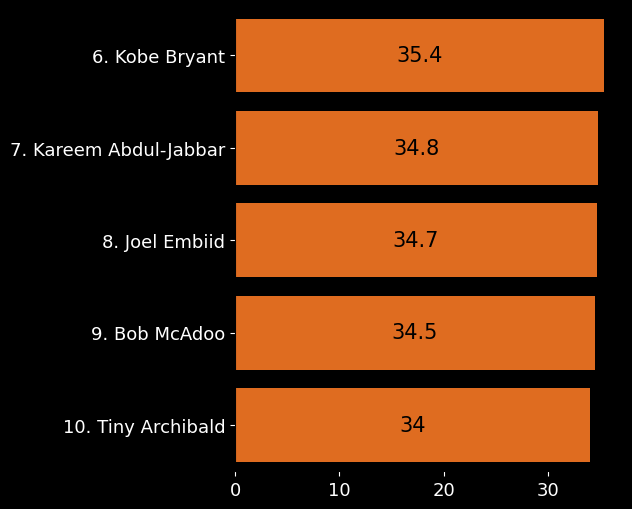

In [36]:
top_ppg = master.sort_values(by='PPG', ascending=False)  
top_ppg = top_ppg[['Player', 'PPG']].groupby('Player').head(1).iloc[5:10]

fig, ax = plt.subplots(figsize=(5,6))
ax.set_facecolor((0, 0, 0))
sns.barplot(data=top_ppg, x='PPG', y='Player', color=(1, 0.4, 0), ax=ax) 
for i in ax.containers:
    ax.bar_label(i, label_type='center', size=15, color='black')
sns.despine()
# plt.title("Highest PPG in a Season", color='white', size=20, loc='left')
ax.xaxis.label.set_color('white') 
ax.yaxis.label.set_color('white')
plt.ylabel('')
y_labels = [f"{i+6}. {label.get_text()}" for i, label in enumerate(ax.get_yticklabels())]
ax.set_yticklabels(y_labels)
plt.xlabel('')
plt.xticks(fontsize=30, color='black')
fig.patch.set_facecolor('black')
ax.tick_params(axis='both', which='major', labelsize=13, colors='white')

C:\Users\bchan\AppData\Local\Temp\ipykernel_21688\3931426032.py:13: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  ax.set_yticklabels(y_labels)


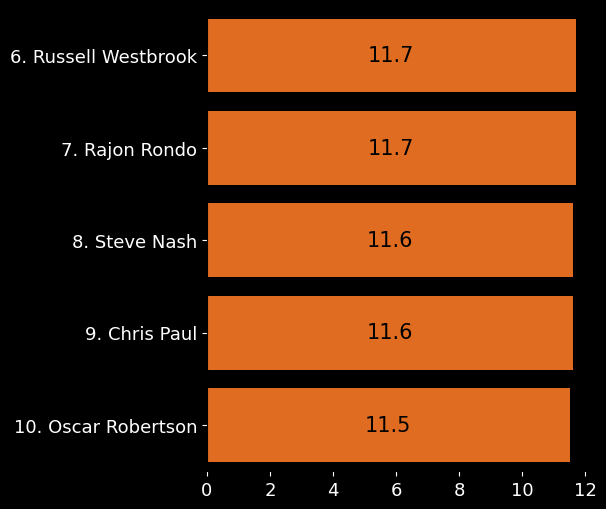

In [43]:
top_apg = master.sort_values(by='APG', ascending=False)  
top_apg = top_apg[['Player', 'APG']].groupby('Player').head(1).iloc[5:10] 
fig, ax = plt.subplots(figsize=(5,6))
ax.set_facecolor((0, 0, 0))
sns.barplot(data=top_apg, x='APG', y='Player', color=(1, 0.4, 0), ax=ax) 
for i in ax.containers:
    ax.bar_label(i, label_type='center', size=15, color='black')
sns.despine()
ax.xaxis.label.set_color('white') 
ax.yaxis.label.set_color('white')
plt.ylabel('')
y_labels = [f"{i+6}. {label.get_text()}" for i, label in enumerate(ax.get_yticklabels())]
ax.set_yticklabels(y_labels)
plt.xlabel('')
plt.xticks(fontsize=30, color='black')
fig.patch.set_facecolor('black')
ax.tick_params(axis='both', which='major', labelsize=13, colors='white')

In [34]:
top_apg = master.sort_values(by='RPG', ascending=False)  
top_apg[['Player', 'RPG']].groupby('Player').head(1).head(5) 

,Player,RPG
1384,Wilt Chamberlain,27.2
1627,Bill Russell,24.7
2189,Nate Thurmond,22.0
1891,Jerry Lucas,21.1
1307,Bob Pettit,20.3
